In [1]:
!pip  install wordcloud

In [2]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [54]:
#Import libraries
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from textblob import TextBlob
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC

import matplotlib.pyplot as plt


In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
 
nltk.download('omw-1.4')
 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreyasingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyasingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreyasingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shreyasingh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
df = pd.read_csv('/Users/shreyasingh/Downloads/blogs.csv')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


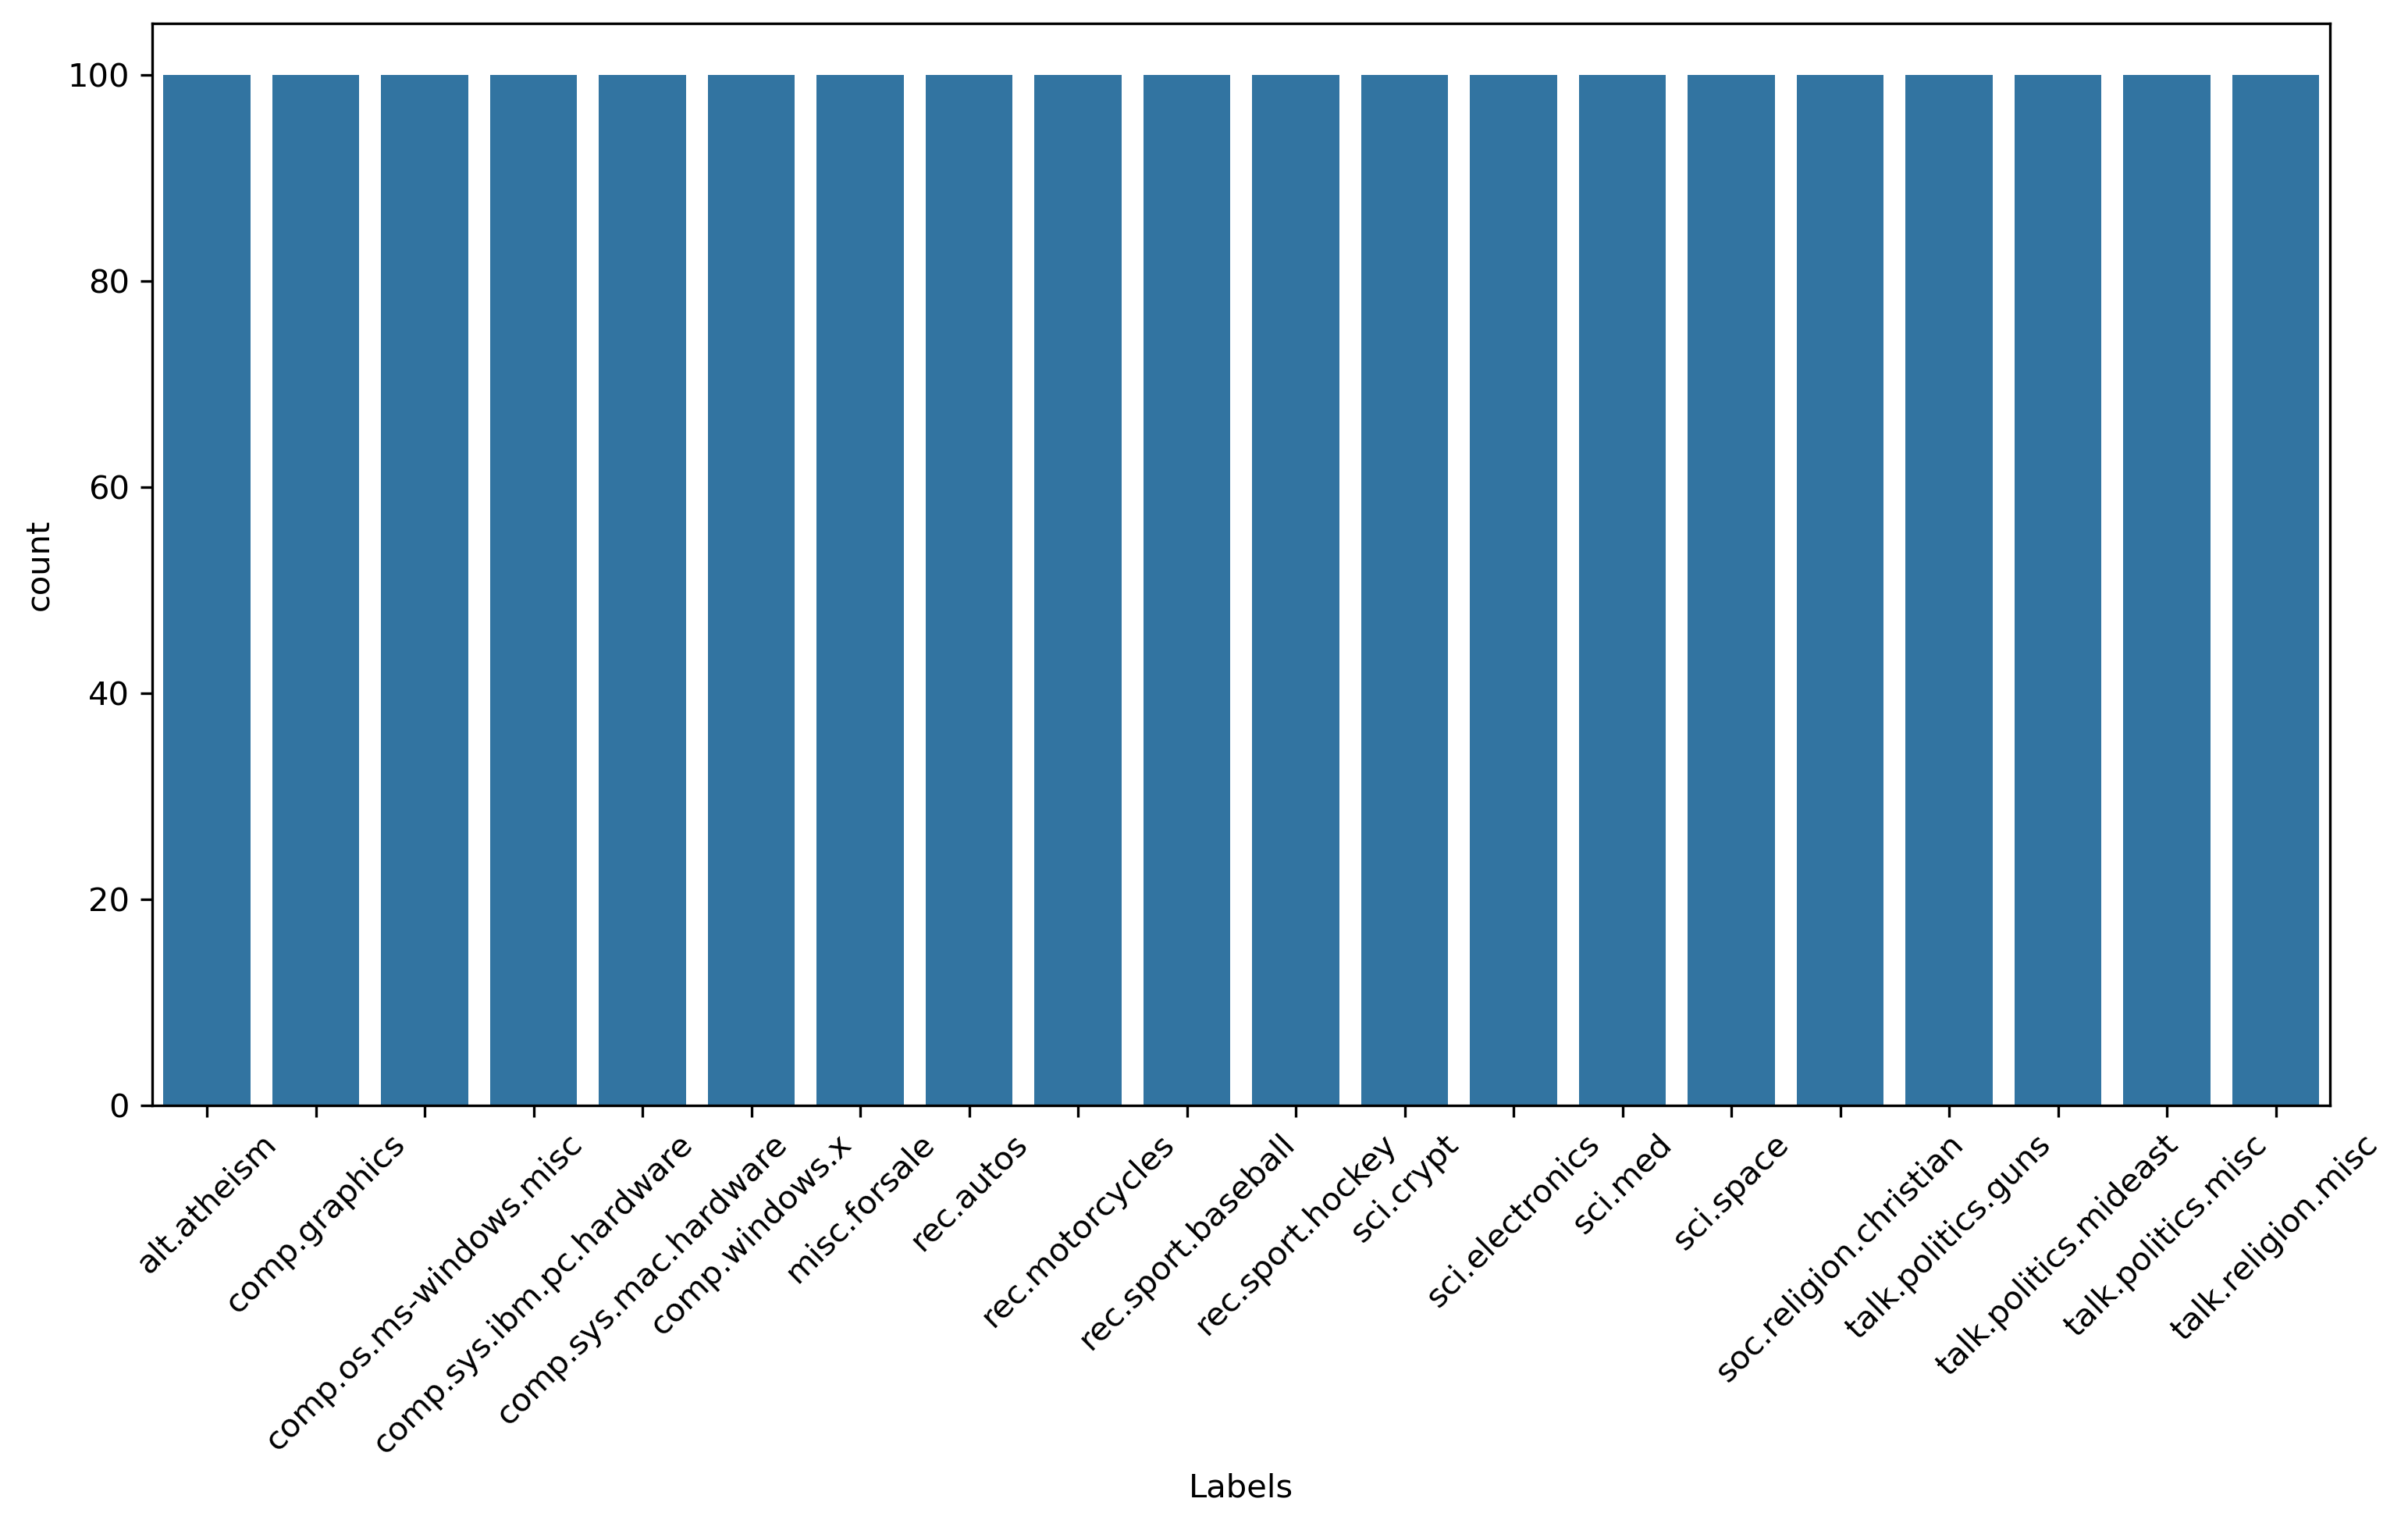

In [6]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed  
sns.countplot(x='Labels', data=df)  
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary  
plt.show() 

In [7]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [8]:
df.isna().sum()

Data      0
Labels    0
dtype: int64

In [9]:
df['Data'] = df['Data'].fillna('')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [11]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [12]:
# Initialize text preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [13]:
# Remove rows where Cleaned_Data is empty
# data = df[df['Cleaned_Data'].str.strip() != '']

In [14]:
# Text preprocessing function
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    processed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(processed_tokens)

In [15]:
# Apply preprocessing to the "Data" column
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [16]:
# Display the first few rows of the cleaned data
print("\nCleaned Data Sample:\n", df[['Data', 'Cleaned_Data']].head())


Cleaned Data Sample:
                                                 Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroup altath path cantaloupesrvcscmueducra...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [17]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust feature limit as needed
X = vectorizer.fit_transform(df['Cleaned_Data'])  # TF-IDF matrix

In [18]:
#Display TF-IDF feature names and shape
print("\nTF-IDF Feature Names:\n", vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix Shape:", X.shape)


TF-IDF Feature Names:
 ['00' '01' '0100' ... 'zoolog' 'zoom' 'zterm']

TF-IDF Matrix Shape: (2000, 5000)


In [19]:
# Labels for classification
y = df['Labels']

In [20]:
# Convert labels into a numerical format if needed (optional step)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [21]:
# Display encoded labels
print("\nEncoded Labels Sample:", y_encoded[:5])


Encoded Labels Sample: [0 0 0 0 0]


In [22]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Labels'])

In [23]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(  
    X, y_encoded, test_size=0.2, random_state=42  
)  

In [24]:
# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)  # Train the model
y_pred = nb_classifier.predict(X_test)  # Predict on test set

In [25]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.78      0.58        18
           1       0.79      0.83      0.81        18
           2       0.79      0.86      0.83        22
           3       0.83      0.80      0.82        25
           4       0.86      0.86      0.86        21
           5       0.92      0.88      0.90        25
           6       0.79      0.61      0.69        18
           7       0.94      0.94      0.94        18
           8       0.83      0.94      0.88        16
           9       0.82      1.00      0.90        18
          10       1.00      1.00      1.00        15
          11       0.82      0.95      0.88        19
          12       0.75      0.75      0.75        16
          13       0.88      0.88      0.88        17
          14       1.00      0.86      0.92        21
          15       0.85      0.96      0.90        23
          16       0.88      0.79      0.

In [26]:
# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)  # Analyze the text
    polarity = analysis.sentiment.polarity  # Polarity score: [-1, 1]
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [27]:
# Apply sentiment analysis to the "Data" column
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [28]:
# Display the first few rows with sentiments
print("\nSample Data with Sentiments:\n", df[['Data', 'Sentiment']].head())



Sample Data with Sentiments:
                                                 Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive



Sentiment Distribution Across Categories:
 Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religi

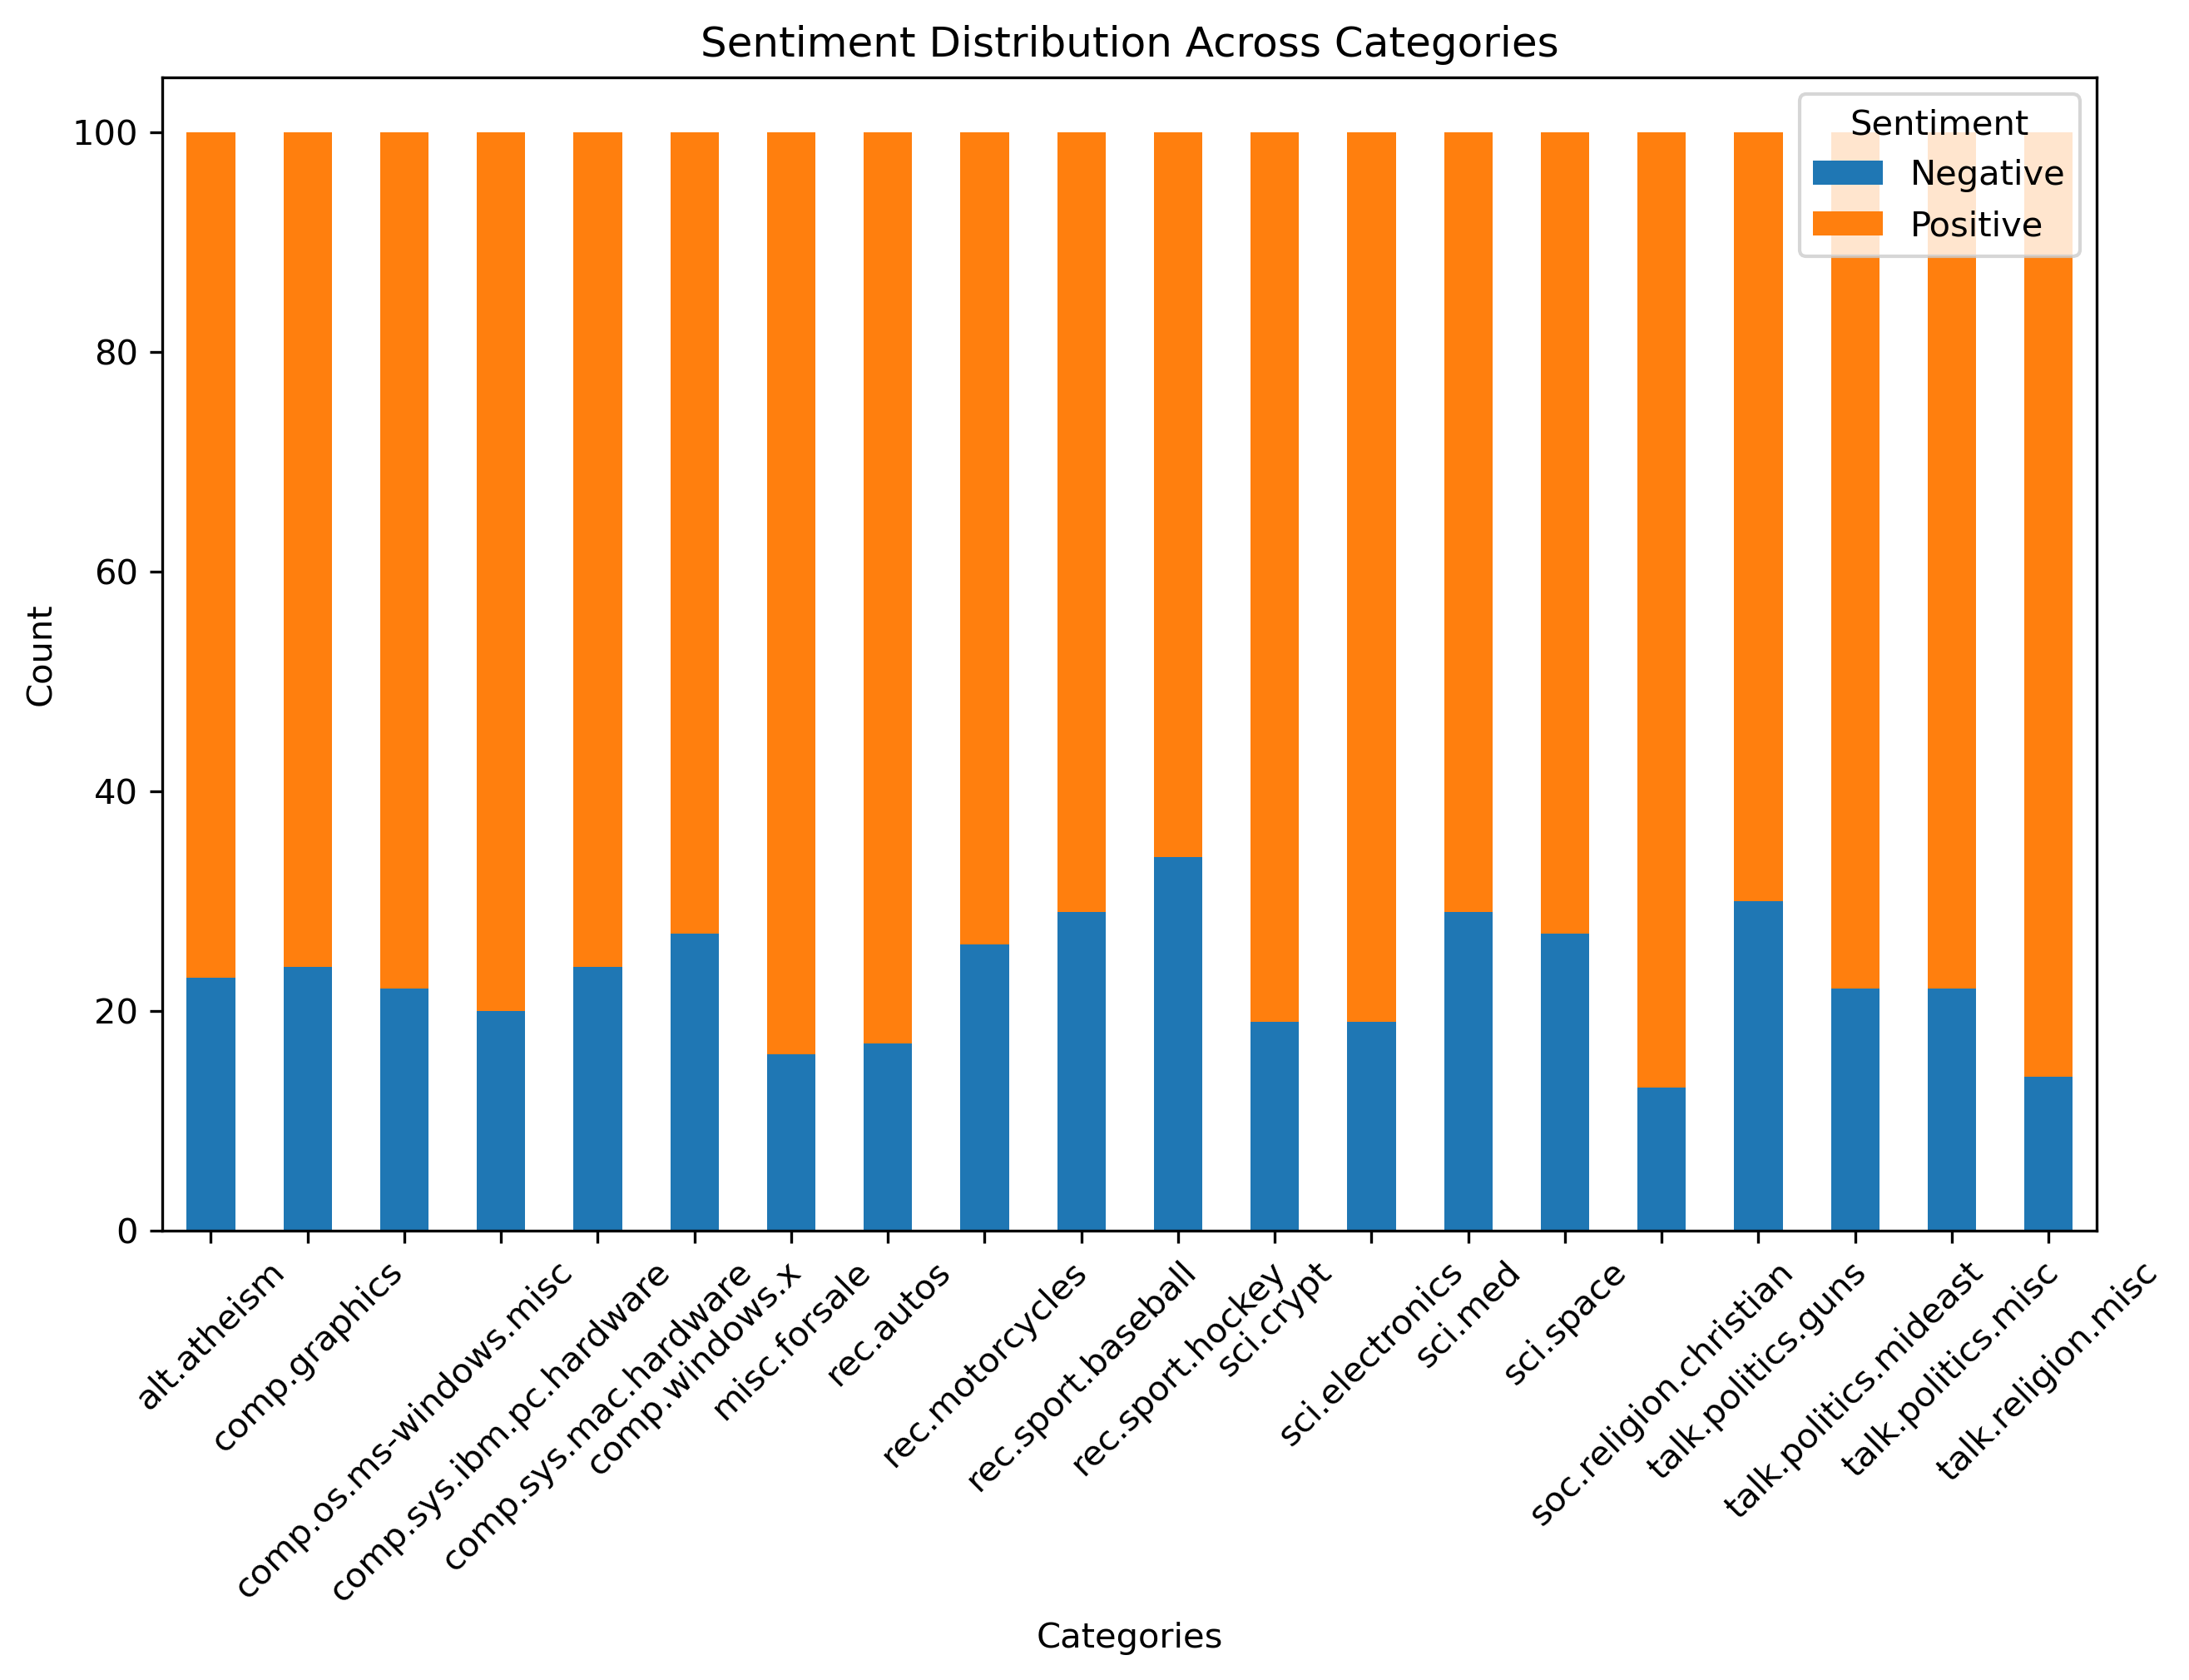

In [29]:
# Analyze sentiment distribution across categories
if 'Labels' in df.columns:
    sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
    print("\nSentiment Distribution Across Categories:\n", sentiment_distribution)

# Visualize sentiment distribution
    sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title("Sentiment Distribution Across Categories")
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.legend(title="Sentiment")
    plt.xticks(rotation=45)
    plt.show()

else:
    # If no category labels are available, summarize overall sentiment distribution
    overall_sentiment = df['Sentiment'].value_counts()
    print("\nOverall Sentiment Distribution:\n", overall_sentiment)

    # Visualize overall sentiment distribution
    overall_sentiment.plot(kind='bar', color=['green', 'red', 'blue'], figsize=(6, 4))
    plt.title("Overall Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()


In [30]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for imbalance
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [31]:
# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.82


In [32]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.78      0.58        18
           1       0.79      0.83      0.81        18
           2       0.79      0.86      0.83        22
           3       0.83      0.80      0.82        25
           4       0.86      0.86      0.86        21
           5       0.92      0.88      0.90        25
           6       0.79      0.61      0.69        18
           7       0.94      0.94      0.94        18
           8       0.83      0.94      0.88        16
           9       0.82      1.00      0.90        18
          10       1.00      1.00      1.00        15
          11       0.82      0.95      0.88        19
          12       0.75      0.75      0.75        16
          13       0.88      0.88      0.88        17
          14       1.00      0.86      0.92        21
          15       0.85      0.96      0.90        23
          16       0.88      0.79      0.83        28
  

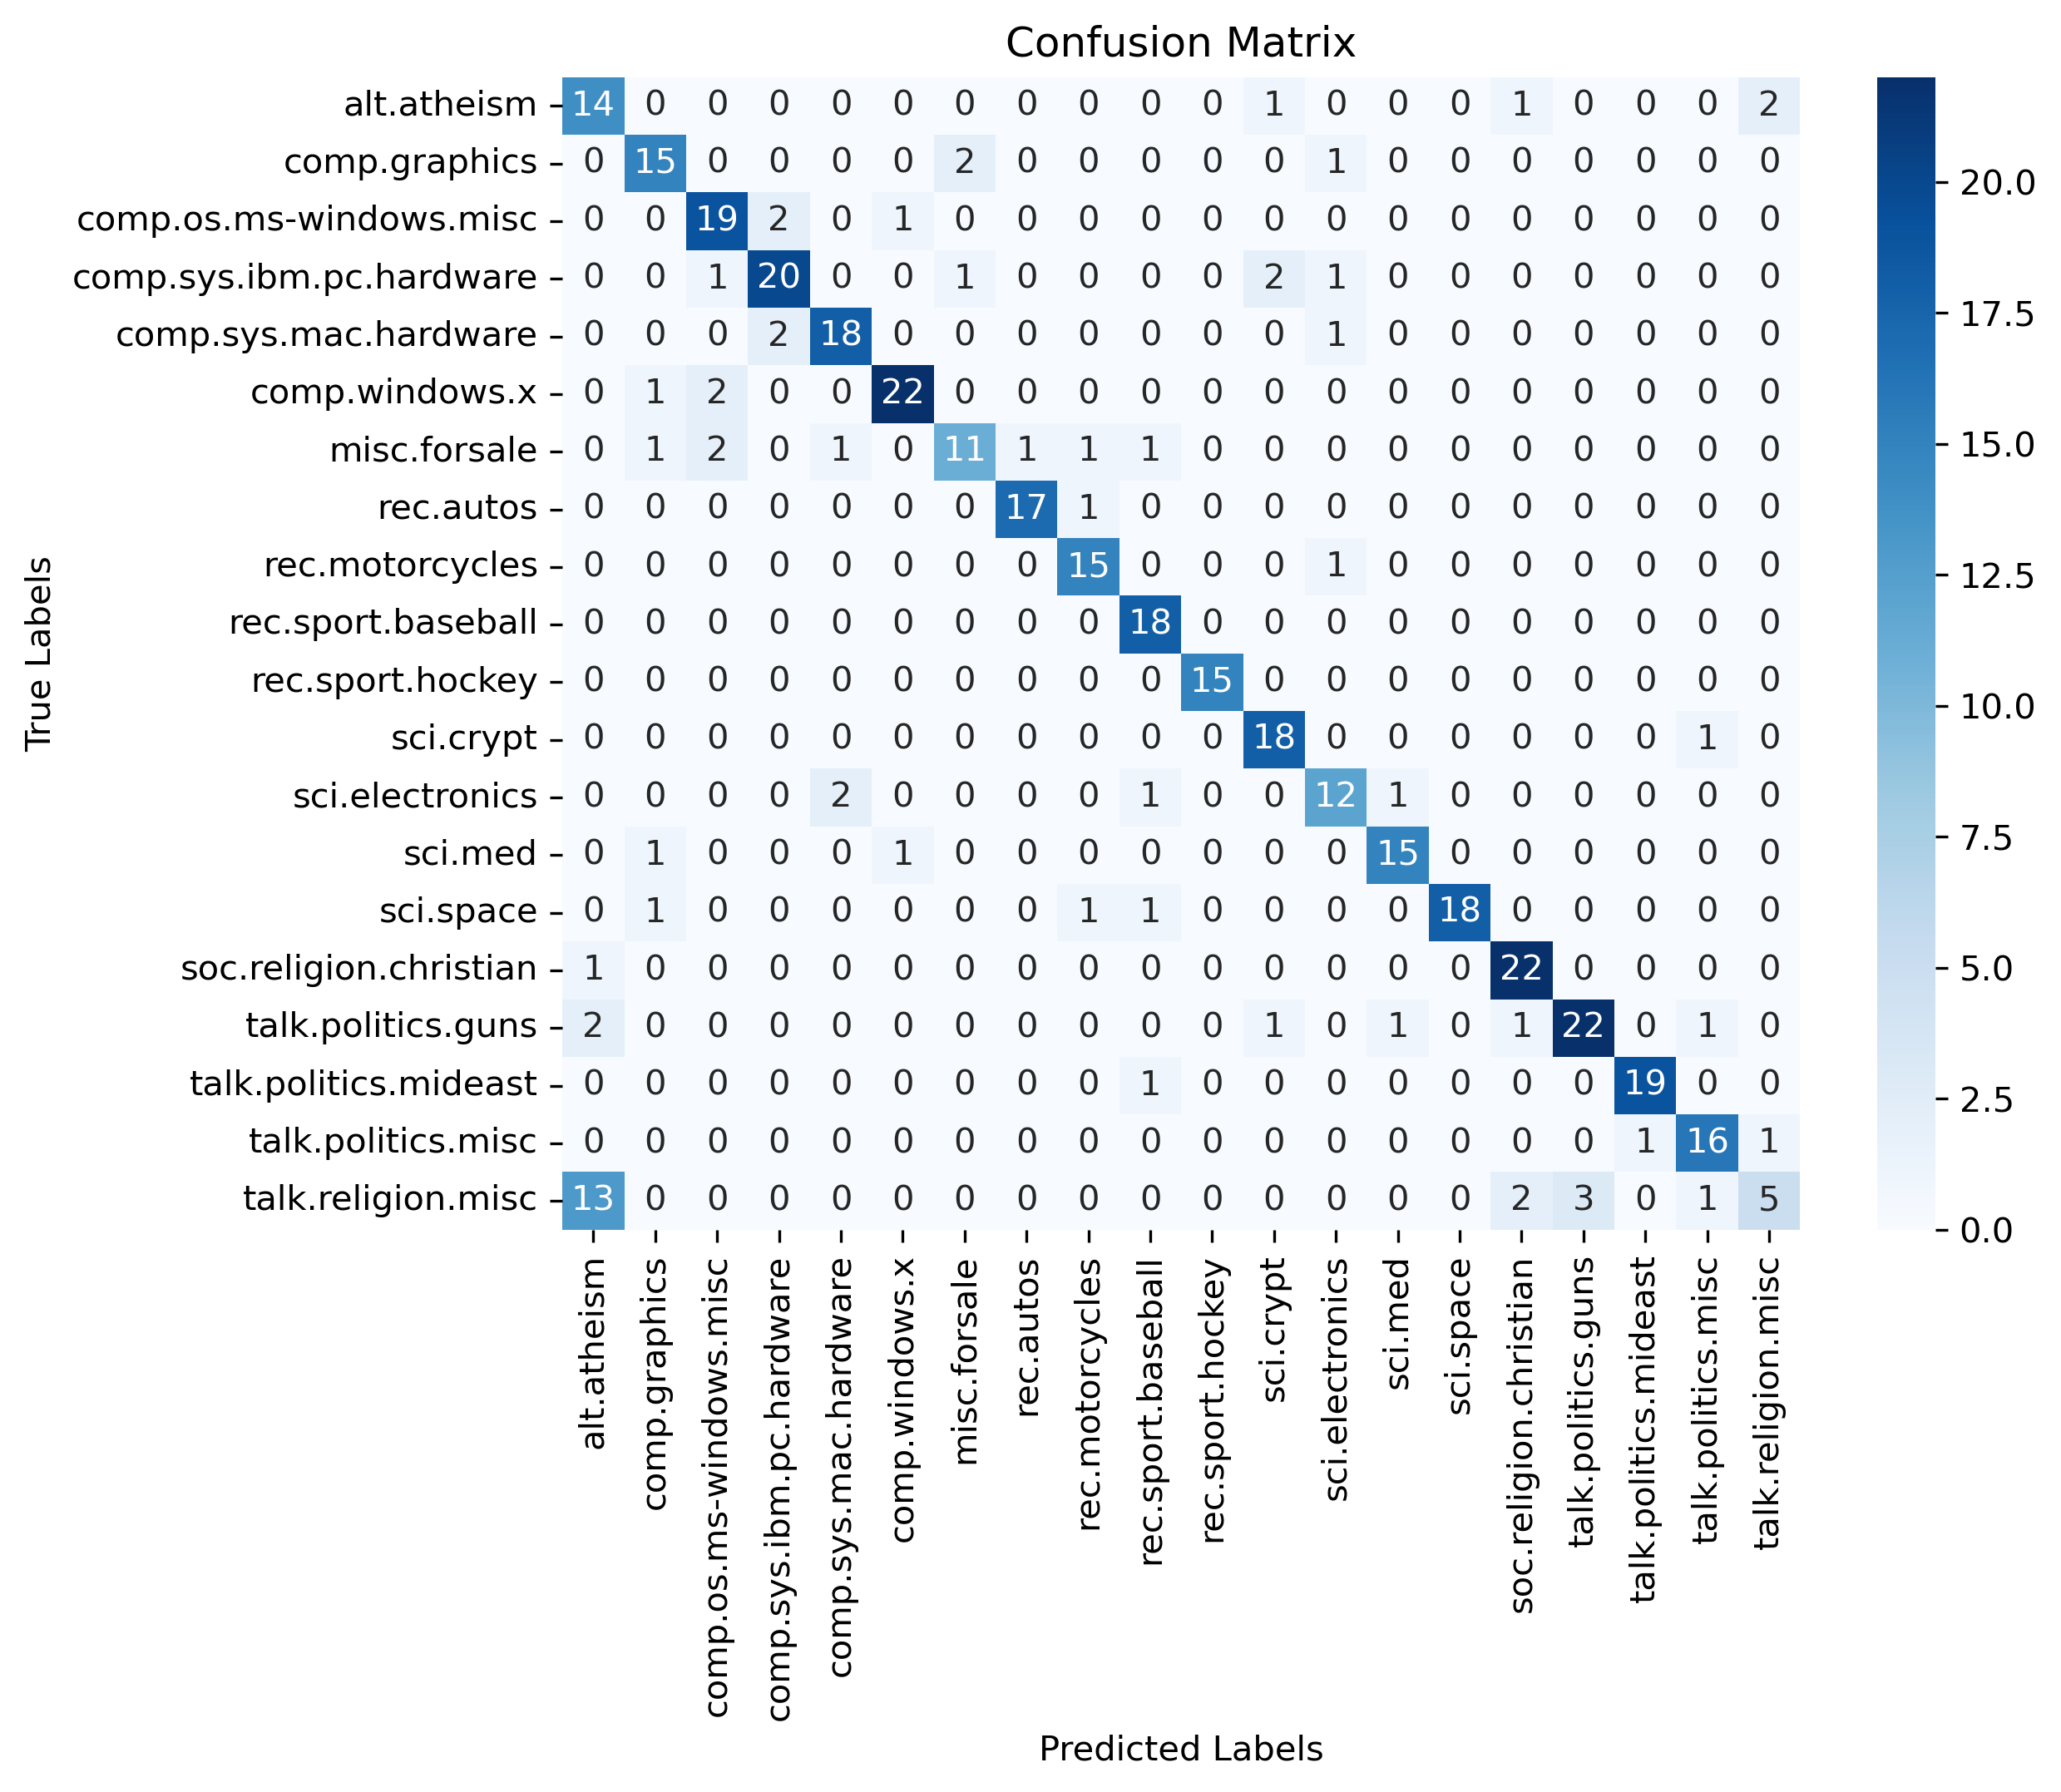

In [33]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [34]:
#  Preprocessing Function
def preprocess_text(text, lemmatize=True, stem=False):
    """Clean and preprocess text data with optional lemmatization or stemming."""
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces
    text = text.lower()  # Convert to lowercase
    words = nltk.word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    
    return ' '.join(words)

In [38]:
# Apply preprocessing
df['processed_text'] = df['Labels'].apply(lambda x: preprocess_text(x, lemmatize=True))


In [56]:
# Initialize Models
models = {
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [58]:
# Train and Evaluate Models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

Model: SVM
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.88      0.83      0.86        18
           2       0.90      0.86      0.88        22
           3       0.84      0.84      0.84        25
           4       0.87      0.95      0.91        21
           5       0.89      0.96      0.92        25
           6       0.88      0.78      0.82        18
           7       0.89      0.94      0.92        18
           8       1.00      0.81      0.90        16
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        15
          11       0.95      0.95      0.95        19
          12       0.74      0.88      0.80        16
          13       0.89      0.94      0.91        17
          14       0.95      0.95      0.95        21
          15       0.96      0.96      0.96        23
          16       0.88      0.82      0.85        28
          17    

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_66807/778281415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')


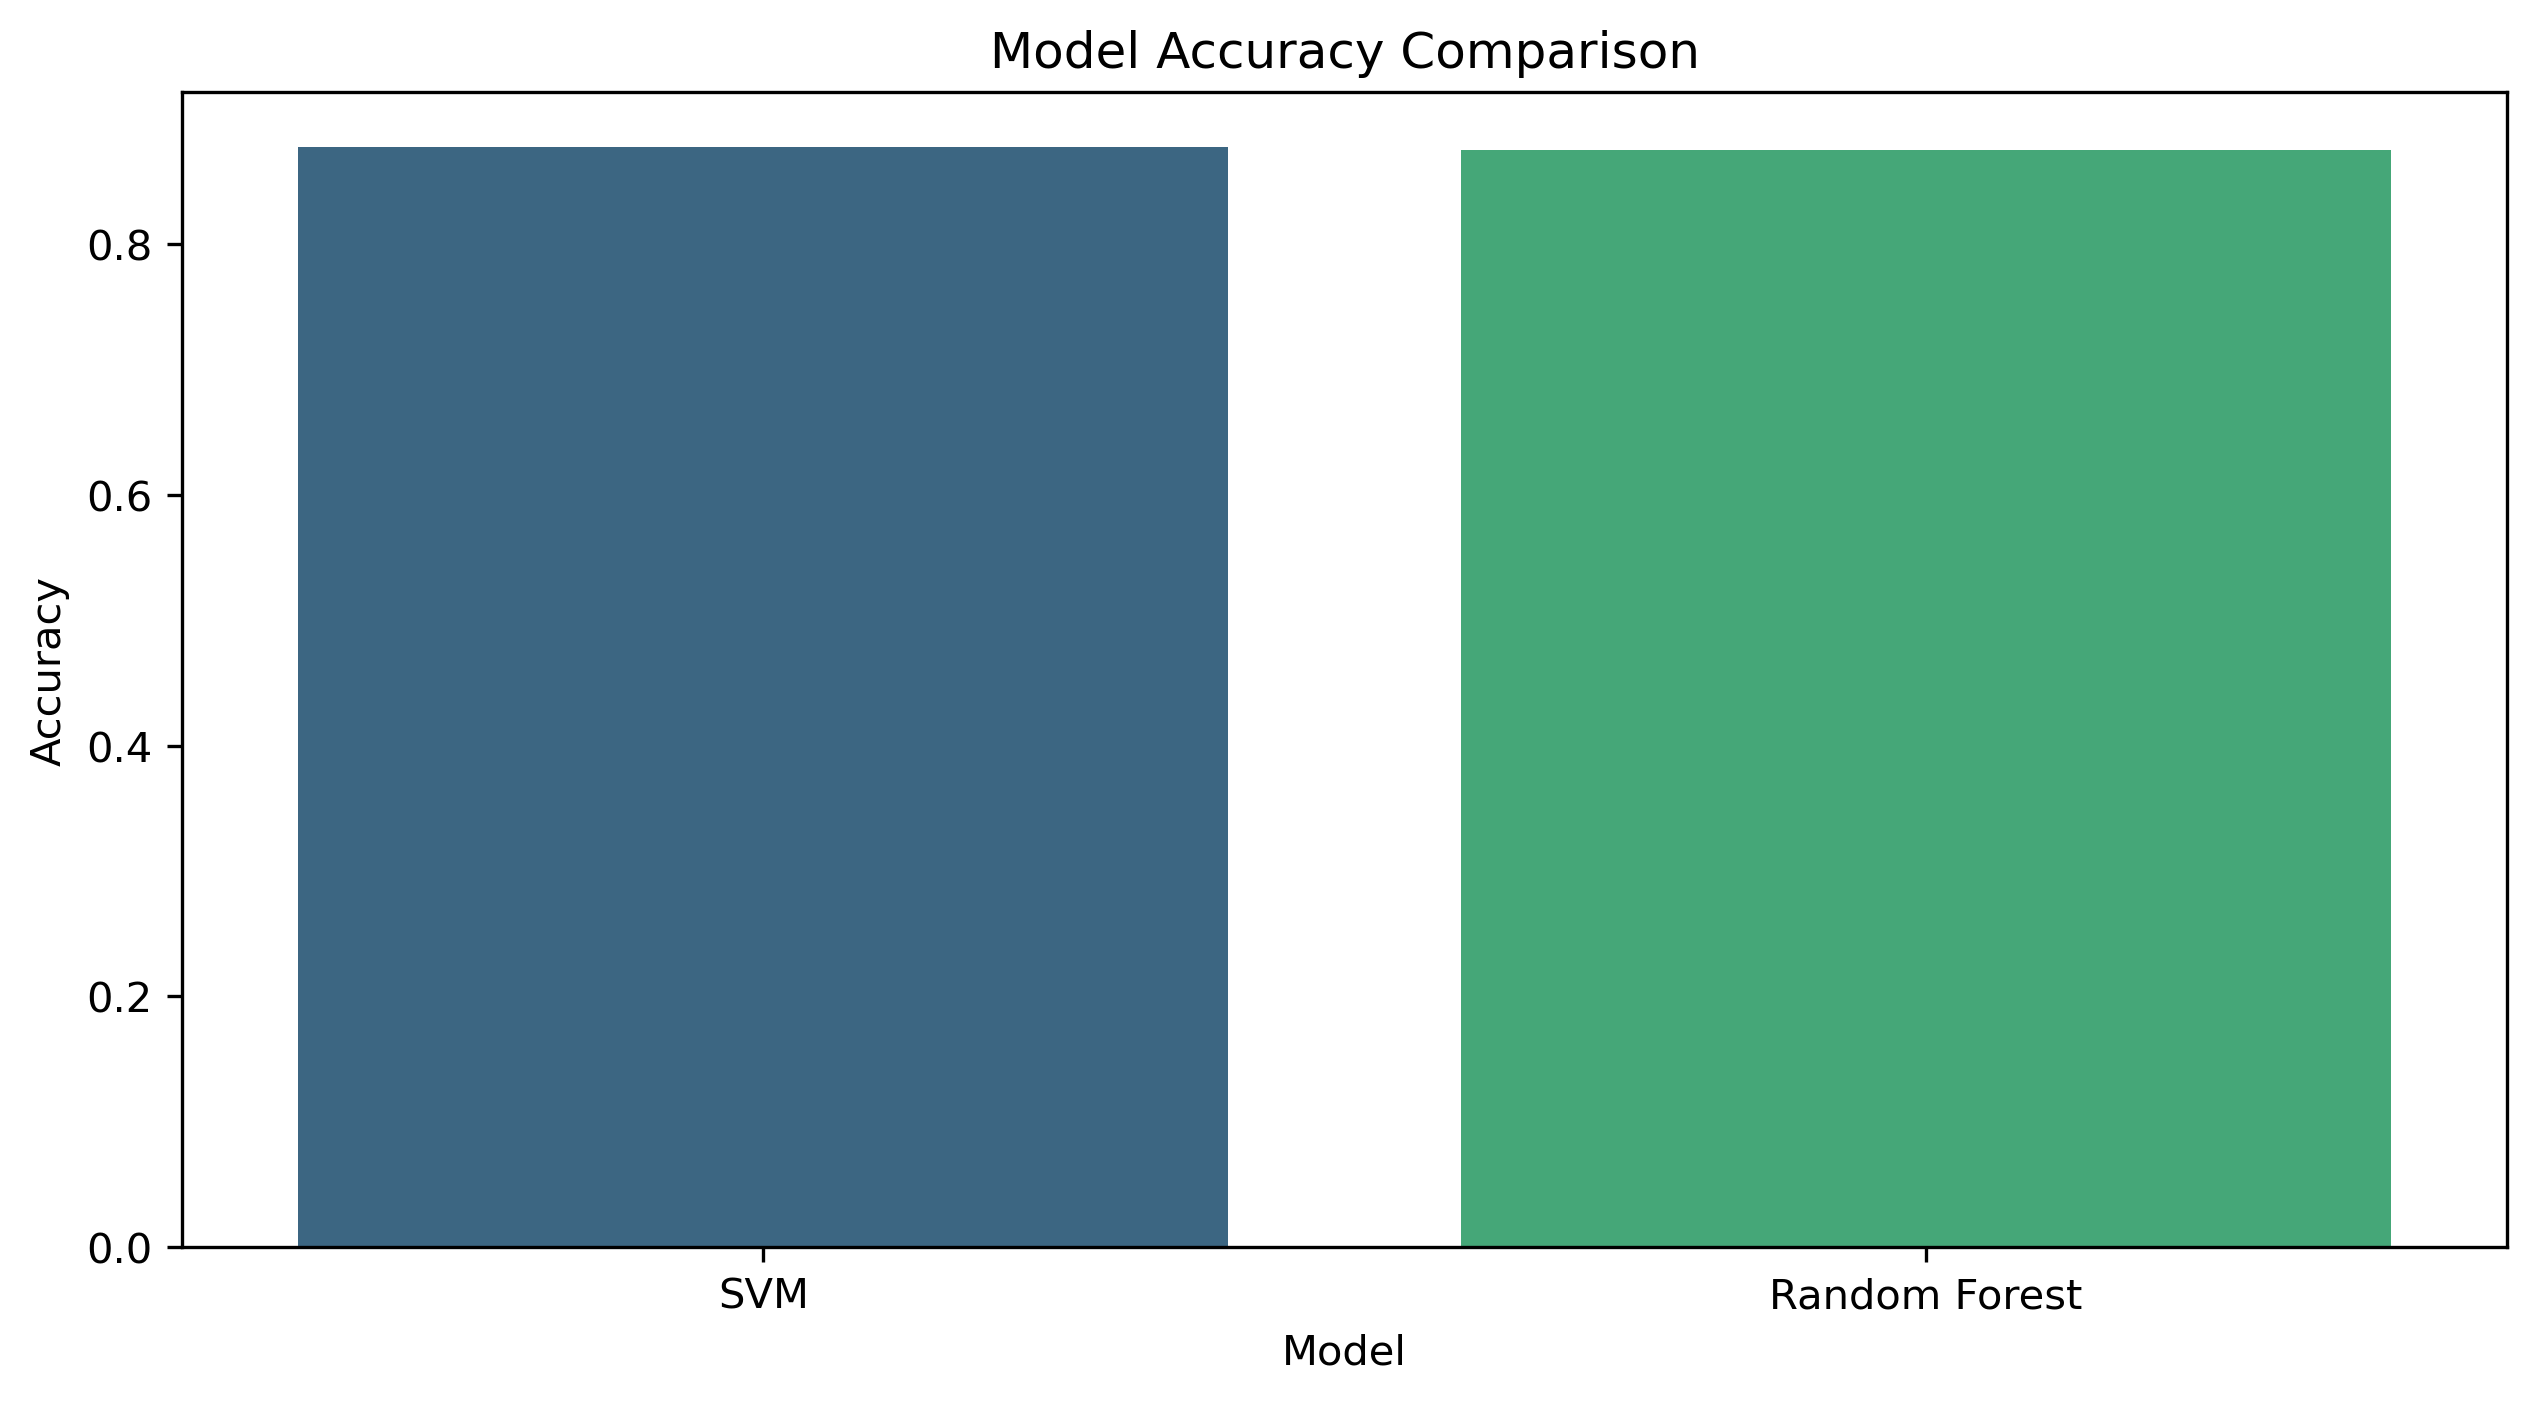

In [59]:
# Visualize Results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
 